In [2]:
# install wandb
!pip install wandb
# install nequip
!git clone --depth 1 "https://github.com/mir-group/nequip.git"
!pip install nequip/
# fix colab imports
import site
site.main()
# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"
#!pip install --force-reinstall numpy==1.24.4
import numpy as np
import torch
from ase.io import read, write
np.random.seed(0)
torch.manual_seed(0)

fatal: destination path 'nequip' already exists and is not an empty directory.
Processing ./nequip
  Created wheel for nequip: filename=nequip-0.5.6-py3-none-any.whl size=145588 sha256=a066f72889c76ece24396b81dd2060349f764f60610d41c1b6c550748528e27f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6fj1htlz/wheels/80/56/d0/8c177a96680ed505faaa19d75c49462c6f11e9a0953bce6613
Successfully built nequip
  Attempting uninstall: nequip
    Found existing installation: nequip 0.5.6
    Uninstalling nequip-0.5.6:
      Successfully uninstalled nequip-0.5.6


/home/adamr/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# compile lammps
!git clone -b stable_29Sep2021_update2 --depth 1 https://github.com/lammps/lammps.git
#!wget "https://github.com/mir-group/pair_nequip/archive/main.zip"
#!unzip -q main.zip
#!rm main.zip
#!mv pair_nequip-main pair_nequip
!cd pair_nequip && ./patch_lammps.sh ../lammps
!pip install mkl mkl-include
!cd lammps && mkdir -p build && cd build && cmake ../cmake -DPKG_KSPACE=ON -DCMAKE_PREFIX_PATH=`python -c 'import torch;print(torch.utils.cmake_prefix_path)'` && make -j4

fatal: destination path 'lammps' already exists and is not an empty directory.
This LAMMPS installation _seems_ to already have been patched; please check it!
-- Running check for auto-generated files from make-based build system
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
-- Could NOT find FFMPEG (missing: FFMPEG_EXECUTABLE) 
-- Checking for module 'fftw3'
--   No package 'fftw3' found
-- Generating style headers...
-- Generating package headers...
-- Generating lmpinstalledpkgs.h...
-- Could NOT find ClangFormat (missing: ClangFormat_EXECUTABLE) (Required is at least version "8.0")
-- The following tools and libraries have been found and configured:
 * Git
 * MPI
 * OpenMP
 * PkgConfig

-- <<< Build configuration >>>
   Operating System: Linux Ubuntu 20.04
   Build type:       RelWithDebInfo
   Install path:     /home/adamr/.local
   Generator:        Unix Makefiles using /bin/make
-- Enabled packages: KSPACE
-- <<< Compilers and Flags: >>>
-- C++ Compiler:     /bin/c++


In [4]:
!cd ~
!git clone https://github.com/timduignan/LiCl-CG.git
!pip install MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis import distances,rdf
from matplotlib import pyplot as plt
# run sim once
!cd LiCl-CG/licl-cg/training/ && nequip-train default.yaml

Cloning into 'LiCl-CG'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 2), reused 25 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), 10.52 MiB | 3.87 MiB/s, done.
     |████████████████████████████████| 8.1 MB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 632 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.4 MB/s eta 0:00:01     |█▍                              | 133 kB 2.4 MB/s eta 0:00:02
     |████████████████████████████████| 2.1 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 720 kB/s eta 0:00:01
     |████████████████████████████████| 43 kB 912 kB/s eta 0:00:01
     |████████████████████████████████| 534 kB 2.3 MB/s eta 0:00:01
Torch device: cpu
Processing dataset...
Loaded data: Batch(batch=[230400], edge_cell_shift=[2737872, 3]

In [5]:
!cd LiCl-CG/licl-cg/training/results/default_LiCl/ && nequip-deploy  build --train-dir ./ licl-deployted.pth

INFO:root:Loading best_model from training session...
INFO:root:Compiled & optimized model.


In [6]:
# topol file
LiCl_topolfile = """ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
48
ITEM: BOX BOUNDS pp pp pp
0.0000000000000000e+00 2.5260000000000002e+01
0.0000000000000000e+00 2.5260000000000002e+01
0.0000000000000000e+00 2.5260000000000002e+01
ITEM: ATOMS id type xu yu zu
1 Li 1 1 1
25 Cl 2 2 2
2 Li 9.42 1.04 1.02
26 Cl 10.42 2.01 2.03
3 Li 17.84 1.08 1.04
27 Cl 18.84 2.02 2.06
4 Li 1.03 9.42 1.01
28 Cl 2.01 10.42 2.02
5 Li 9.45 9.46 1.03
29 Cl 10.43 10.43 2.05
6 Li 17.87 9.5 1.05
30 Cl 18.85 10.44 2.08
7 Li 1.06 17.84 1.02
31 Cl 2.02 18.84 2.04
8 Li 9.48 17.88 1.04
32 Cl 10.44 18.85 2.07
9 Li 17.9 17.92 1.06
33 Cl 18.86 18.86 2.1
10 Li 1.02 1.01 9.42
34 Cl 2.01 2.01 10.42
11 Li 9.44 1.05 9.44
35 Cl 10.43 2.02 10.45
12 Li 17.86 1.09 9.46
36 Cl 18.85 2.03 10.48
13 Li 1.05 9.43 9.43
37 Cl 2.02 10.43 10.44
14 Li 9.47 9.47 9.45
38 Cl 10.44 10.44 10.47
15 Li 17.89 9.51 9.47
39 Cl 18.86 10.45 10.5
16 Li 1.08 17.85 9.44
40 Cl 2.03 18.85 10.46
17 Li 9.5 17.89 9.46
41 Cl 10.45 18.86 10.49
18 Li 17.92 17.93 9.48
42 Cl 18.87 18.87 10.52
19 Li 1.04 1.02 17.84
43 Cl 2.02 2.02 18.84
20 Li 9.46 1.06 17.86
44 Cl 10.44 2.03 18.87
21 Li 17.88 1.1 17.88
45 Cl 18.86 2.04 18.9
22 Li 1.07 9.44 17.85
46 Cl 2.03 10.44 18.86
23 Li 9.49 9.48 17.87
47 Cl 10.45 10.45 18.89
24 Li 17.91 9.52 17.89
48 Cl 18.87 10.46 18.92"""
with open("LiCl-CG/licl-cg/LiCl-out-topol.lammpstrj", "w") as f:
    f.write(LiCl_topolfile)

In [7]:
# topol file
LiCl_topolfile052 = """ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
48
ITEM: BOX BOUNDS pp pp pp
0.0000000000000000e+00 4.2610000000000002e+01
0.0000000000000000e+00 4.2610000000000002e+01
0.0000000000000000e+00 4.2610000000000002e+01
ITEM: ATOMS id type xu yu zu
1 Li 1 1 1
25 Cl 2 2 2
2 Li 9.42 1.04 1.02
26 Cl 10.42 2.01 2.03
3 Li 17.84 1.08 1.04
27 Cl 18.84 2.02 2.06
4 Li 1.03 9.42 1.01
28 Cl 2.01 10.42 2.02
5 Li 9.45 9.46 1.03
29 Cl 10.43 10.43 2.05
6 Li 17.87 9.5 1.05
30 Cl 18.85 10.44 2.08
7 Li 1.06 17.84 1.02
31 Cl 2.02 18.84 2.04
8 Li 9.48 17.88 1.04
32 Cl 10.44 18.85 2.07
9 Li 17.9 17.92 1.06
33 Cl 18.86 18.86 2.1
10 Li 1.02 1.01 9.42
34 Cl 2.01 2.01 10.42
11 Li 9.44 1.05 9.44
35 Cl 10.43 2.02 10.45
12 Li 17.86 1.09 9.46
36 Cl 18.85 2.03 10.48
13 Li 1.05 9.43 9.43
37 Cl 2.02 10.43 10.44
14 Li 9.47 9.47 9.45
38 Cl 10.44 10.44 10.47
15 Li 17.89 9.51 9.47
39 Cl 18.86 10.45 10.5
16 Li 1.08 17.85 9.44
40 Cl 2.03 18.85 10.46
17 Li 9.5 17.89 9.46
41 Cl 10.45 18.86 10.49
18 Li 17.92 17.93 9.48
42 Cl 18.87 18.87 10.52
19 Li 1.04 1.02 17.84
43 Cl 2.02 2.02 18.84
20 Li 9.46 1.06 17.86
44 Cl 10.44 2.03 18.87
21 Li 17.88 1.1 17.88
45 Cl 18.86 2.04 18.9
22 Li 1.07 9.44 17.85
46 Cl 2.03 10.44 18.86
23 Li 9.49 9.48 17.87
47 Cl 10.45 10.45 18.89
24 Li 17.91 9.52 17.89
48 Cl 18.87 10.46 18.92"""
with open("LiCl-CG/licl-cg/LiCl-out-topol052.lammpstrj", "w") as f:
    f.write(LiCl_topolfile052)

system052 = """LAMMPS Description

     48  atoms
     2  atom types

  0.0 42.61 xlo xhi
  0.0 42.61 ylo yhi
  0.0 42.61 zlo zhi

Masses

1 6.941  # Li
2 35.453  # Cl

Atoms  # full

1 1 1.0 1.0 1.0 1.0
2 1 1.0 9.42 1.04 1.02
3 1 1.0 17.84 1.08 1.04
4 1 1.0 1.03 9.42 1.01
5 1 1.0 9.45 9.459999999999999 1.03
6 1 1.0 17.869999999999997 9.499999999999998 1.05
7 1 1.0 1.06 17.84 1.02
8 1 1.0 9.48 17.88 1.04
9 1 1.0 17.9 17.919999999999998 1.06
10 1 1.0 1.02 1.01 9.42
11 1 1.0 9.44 1.05 9.44
12 1 1.0 17.86 1.09 9.459999999999999
13 1 1.0 1.05 9.43 9.43
14 1 1.0 9.47 9.469999999999999 9.45
15 1 1.0 17.89 9.509999999999998 9.469999999999999
16 1 1.0 1.08 17.85 9.44
17 1 1.0 9.5 17.89 9.459999999999999
18 1 1.0 17.92 17.93 9.479999999999999
19 1 1.0 1.04 1.02 17.84
20 1 1.0 9.459999999999999 1.06 17.86
21 1 1.0 17.88 1.1 17.88
22 1 1.0 1.07 9.44 17.85
23 1 1.0 9.49 9.479999999999999 17.87
24 1 1.0 17.91 9.519999999999998 17.89
25 2 -1.0 2.0 2.0 2.0
26 2 -1.0 10.42 2.01 2.03
27 2 -1.0 18.84 2.02 2.06
28 2 -1.0 2.01 10.42 2.02
29 2 -1.0 10.43 10.43 2.05
30 2 -1.0 18.85 10.44 2.08
31 2 -1.0 2.02 18.84 2.04
32 2 -1.0 10.44 18.85 2.07
33 2 -1.0 18.86 18.860000000000003 2.1
34 2 -1.0 2.01 2.01 10.42
35 2 -1.0 10.43 2.02 10.45
36 2 -1.0 18.85 2.03 10.479999999999999
37 2 -1.0 2.02 10.43 10.44
38 2 -1.0 10.44 10.44 10.469999999999999
39 2 -1.0 18.86 10.45 10.499999999999998
40 2 -1.0 2.03 18.85 10.459999999999999
41 2 -1.0 10.45 18.860000000000003 10.489999999999998
42 2 -1.0 18.869999999999997 18.870000000000005 10.519999999999998
43 2 -1.0 2.02 2.02 18.84
44 2 -1.0 10.44 2.03 18.87
45 2 -1.0 18.86 2.04 18.900000000000002
46 2 -1.0 2.03 10.44 18.86
47 2 -1.0 10.45 10.45 18.89
48 2 -1.0 18.869999999999997 10.459999999999999 18.92"""

with open("LiCl-CG/licl-cg/system052.data-bigbox", "w") as f:
    f.write(system052)

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (42.610000 42.610000 42.610000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.052 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.24327776
  grid = 18 18 18
  stencil order = 5
  estimated absolute RMS force accuracy = 9.9419343e-06
  estimated relative force accuracy = 6.9042912e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 12167 5832
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 200

/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


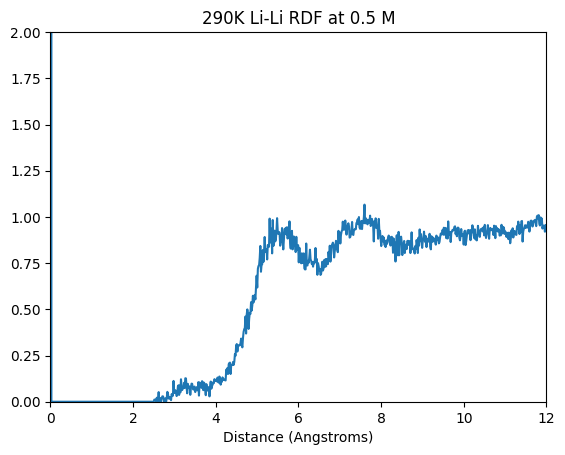

In [8]:
# 290 K ...
in290 = """units           metal
boundary        p p p
atom_style      charge
newton off
kspace_style pppm 0.000001
neighbor        2.0 bin
neigh_modify    every 10 delay 0 check no
read_data	system052.data-bigbox
dielectric 78.3
velocity        all create 300.0 23456789
pair_style hybrid/overlay nequip  coul/long  10.0
pair_coeff  * * coul/long
pair_coeff * *  nequip  training/results/default_LiCl/licl-deployted.pth  Li Cl
fix             1 all nvt temp 290.0 290.0 .05
timestep        0.0005
thermo_style    custom step pe ke etotal temp press vol
thermo          100
dump		1 all custom 20 LiCl-out.lammpstrj id element xu yu zu
dump_modify     1 element Li Cl
restart 	50000 restartfile1 restartfile2
run             400000"""
with open("LiCl-CG/licl-cg/in290.lammps", "w") as f:
    f.write(in290)
!cd LiCl-CG/licl-cg/ && ../../lammps/build/lmp -in in290.lammps
u=mda.Universe("LiCl-CG/licl-cg/LiCl-out-topol052.lammpstrj","LiCl-CG/licl-cg/LiCl-out.lammpstrj",topology_format='LAMMPSDUMP',format='LAMMPSDUMP')
Lis=u.select_atoms('type Li')
rdfLiLi = rdf.InterRDF(Lis,Lis,nbins=1000)
rdfLiLi.run()
plt.plot(rdfLiLi.results.bins,rdfLiLi.results.rdf)
plt.xlim([0, 12])
plt.ylim([0, 2])
plt.title('290K Li-Li RDF at 0.5 M')
plt.xlabel('Distance (Angstroms)')
plt.savefig('290K05M2.pdf', bbox_inches='tight')
plt.show()

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (91.810000 91.810000 91.810000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.015 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.21227533
  grid = 27 27 27
  stencil order = 5
  estimated absolute RMS force accuracy = 1.4099072e-05
  estimated relative force accuracy = 9.7912639e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 32768 19683
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 20

/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


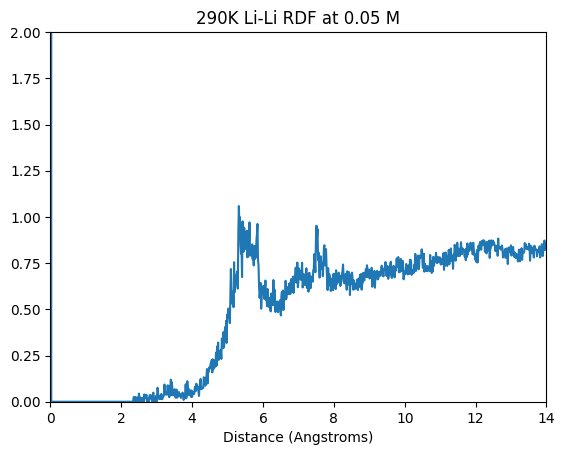

In [11]:
# topol file
LiCl_topolfile005 = """ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
48
ITEM: BOX BOUNDS pp pp pp
0.0000000000000000e+00 9.1810000000000002e+01
0.0000000000000000e+00 9.1810000000000002e+01
0.0000000000000000e+00 9.1810000000000002e+01
ITEM: ATOMS id type xu yu zu
1 Li 1 1 1
25 Cl 2 2 2
2 Li 9.42 1.04 1.02
26 Cl 10.42 2.01 2.03
3 Li 17.84 1.08 1.04
27 Cl 18.84 2.02 2.06
4 Li 1.03 9.42 1.01
28 Cl 2.01 10.42 2.02
5 Li 9.45 9.46 1.03
29 Cl 10.43 10.43 2.05
6 Li 17.87 9.5 1.05
30 Cl 18.85 10.44 2.08
7 Li 1.06 17.84 1.02
31 Cl 2.02 18.84 2.04
8 Li 9.48 17.88 1.04
32 Cl 10.44 18.85 2.07
9 Li 17.9 17.92 1.06
33 Cl 18.86 18.86 2.1
10 Li 1.02 1.01 9.42
34 Cl 2.01 2.01 10.42
11 Li 9.44 1.05 9.44
35 Cl 10.43 2.02 10.45
12 Li 17.86 1.09 9.46
36 Cl 18.85 2.03 10.48
13 Li 1.05 9.43 9.43
37 Cl 2.02 10.43 10.44
14 Li 9.47 9.47 9.45
38 Cl 10.44 10.44 10.47
15 Li 17.89 9.51 9.47
39 Cl 18.86 10.45 10.5
16 Li 1.08 17.85 9.44
40 Cl 2.03 18.85 10.46
17 Li 9.5 17.89 9.46
41 Cl 10.45 18.86 10.49
18 Li 17.92 17.93 9.48
42 Cl 18.87 18.87 10.52
19 Li 1.04 1.02 17.84
43 Cl 2.02 2.02 18.84
20 Li 9.46 1.06 17.86
44 Cl 10.44 2.03 18.87
21 Li 17.88 1.1 17.88
45 Cl 18.86 2.04 18.9
22 Li 1.07 9.44 17.85
46 Cl 2.03 10.44 18.86
23 Li 9.49 9.48 17.87
47 Cl 10.45 10.45 18.89
24 Li 17.91 9.52 17.89
48 Cl 18.87 10.46 18.92"""
with open("LiCl-CG/licl-cg/LiCl-out-topol005.lammpstrj", "w") as f:
    f.write(LiCl_topolfile005)

system005 = """LAMMPS Description

     48  atoms
     2  atom types

  0.0 91.81 xlo xhi
  0.0 91.81 ylo yhi
  0.0 91.81 zlo zhi

Masses

1 6.941  # Li
2 35.453  # Cl

Atoms  # full

1 1 1.0 1.0 1.0 1.0
2 1 1.0 9.42 1.04 1.02
3 1 1.0 17.84 1.08 1.04
4 1 1.0 1.03 9.42 1.01
5 1 1.0 9.45 9.459999999999999 1.03
6 1 1.0 17.869999999999997 9.499999999999998 1.05
7 1 1.0 1.06 17.84 1.02
8 1 1.0 9.48 17.88 1.04
9 1 1.0 17.9 17.919999999999998 1.06
10 1 1.0 1.02 1.01 9.42
11 1 1.0 9.44 1.05 9.44
12 1 1.0 17.86 1.09 9.459999999999999
13 1 1.0 1.05 9.43 9.43
14 1 1.0 9.47 9.469999999999999 9.45
15 1 1.0 17.89 9.509999999999998 9.469999999999999
16 1 1.0 1.08 17.85 9.44
17 1 1.0 9.5 17.89 9.459999999999999
18 1 1.0 17.92 17.93 9.479999999999999
19 1 1.0 1.04 1.02 17.84
20 1 1.0 9.459999999999999 1.06 17.86
21 1 1.0 17.88 1.1 17.88
22 1 1.0 1.07 9.44 17.85
23 1 1.0 9.49 9.479999999999999 17.87
24 1 1.0 17.91 9.519999999999998 17.89
25 2 -1.0 2.0 2.0 2.0
26 2 -1.0 10.42 2.01 2.03
27 2 -1.0 18.84 2.02 2.06
28 2 -1.0 2.01 10.42 2.02
29 2 -1.0 10.43 10.43 2.05
30 2 -1.0 18.85 10.44 2.08
31 2 -1.0 2.02 18.84 2.04
32 2 -1.0 10.44 18.85 2.07
33 2 -1.0 18.86 18.860000000000003 2.1
34 2 -1.0 2.01 2.01 10.42
35 2 -1.0 10.43 2.02 10.45
36 2 -1.0 18.85 2.03 10.479999999999999
37 2 -1.0 2.02 10.43 10.44
38 2 -1.0 10.44 10.44 10.469999999999999
39 2 -1.0 18.86 10.45 10.499999999999998
40 2 -1.0 2.03 18.85 10.459999999999999
41 2 -1.0 10.45 18.860000000000003 10.489999999999998
42 2 -1.0 18.869999999999997 18.870000000000005 10.519999999999998
43 2 -1.0 2.02 2.02 18.84
44 2 -1.0 10.44 2.03 18.87
45 2 -1.0 18.86 2.04 18.900000000000002
46 2 -1.0 2.03 10.44 18.86
47 2 -1.0 10.45 10.45 18.89
48 2 -1.0 18.869999999999997 10.459999999999999 18.92"""

with open("LiCl-CG/licl-cg/system005.data-bigbox", "w") as f:
    f.write(system005)

# 290 K 0.25 M
in290 = """units           metal
boundary        p p p
atom_style      charge
newton off
kspace_style pppm 0.000001
neighbor        2.0 bin
neigh_modify    every 10 delay 0 check no
read_data	system005.data-bigbox
dielectric 78.3
velocity        all create 300.0 23456789
pair_style hybrid/overlay nequip  coul/long  10.0
pair_coeff  * * coul/long
pair_coeff * *  nequip  training/results/default_LiCl/licl-deployted.pth  Li Cl
fix             1 all nvt temp 290.0 290.0 .05
timestep        0.0005
thermo_style    custom step pe ke etotal temp press vol
thermo          100
dump		1 all custom 20 LiCl-out.lammpstrj id element xu yu zu
dump_modify     1 element Li Cl
restart 	50000 restartfile1 restartfile2
run             9000000"""
with open("LiCl-CG/licl-cg/in290.lammps", "w") as f:
    f.write(in290)
!cd LiCl-CG/licl-cg/ && ../../lammps/build/lmp -in in290.lammps
u=mda.Universe("LiCl-CG/licl-cg/LiCl-out-topol005.lammpstrj","LiCl-CG/licl-cg/LiCl-out.lammpstrj",topology_format='LAMMPSDUMP',format='LAMMPSDUMP')
Lis=u.select_atoms('type Li')
rdfLiLi = rdf.InterRDF(Lis,Lis,nbins=1000)
rdfLiLi.run()
plt.plot(rdfLiLi.results.bins,rdfLiLi.results.rdf)
plt.xlim([0, 14])
plt.ylim([0, 2])
plt.title('290K Li-Li RDF at 0.05 M')
plt.xlabel('Distance (Angstroms)')
plt.savefig('290K005M2.pdf', bbox_inches='tight')
plt.show()

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (33.820000 33.820000 33.820000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.004 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.24857298
  grid = 15 15 15
  stencil order = 5
  estimated absolute RMS force accuracy = 1.1179816e-05
  estimated relative force accuracy = 7.7639527e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 8000 3375
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 2000

/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running
Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
Actually running
Actually running
Actually running
Actually running


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Actually running
Actually running
{}


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:439: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


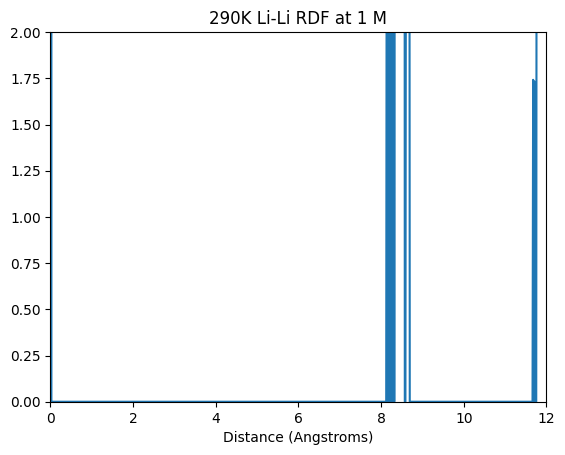

In [7]:
# topol file
LiCl_topolfile053 = """ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
48
ITEM: BOX BOUNDS pp pp pp
0.0000000000000000e+00 3.3820000000000002e+01
0.0000000000000000e+00 3.3820000000000002e+01
0.0000000000000000e+00 3.3820000000000002e+01
ITEM: ATOMS id type xu yu zu
1 Li 1 1 1
25 Cl 2 2 2
2 Li 9.42 1.04 1.02
26 Cl 10.42 2.01 2.03
3 Li 17.84 1.08 1.04
27 Cl 18.84 2.02 2.06
4 Li 1.03 9.42 1.01
28 Cl 2.01 10.42 2.02
5 Li 9.45 9.46 1.03
29 Cl 10.43 10.43 2.05
6 Li 17.87 9.5 1.05
30 Cl 18.85 10.44 2.08
7 Li 1.06 17.84 1.02
31 Cl 2.02 18.84 2.04
8 Li 9.48 17.88 1.04
32 Cl 10.44 18.85 2.07
9 Li 17.9 17.92 1.06
33 Cl 18.86 18.86 2.1
10 Li 1.02 1.01 9.42
34 Cl 2.01 2.01 10.42
11 Li 9.44 1.05 9.44
35 Cl 10.43 2.02 10.45
12 Li 17.86 1.09 9.46
36 Cl 18.85 2.03 10.48
13 Li 1.05 9.43 9.43
37 Cl 2.02 10.43 10.44
14 Li 9.47 9.47 9.45
38 Cl 10.44 10.44 10.47
15 Li 17.89 9.51 9.47
39 Cl 18.86 10.45 10.5
16 Li 1.08 17.85 9.44
40 Cl 2.03 18.85 10.46
17 Li 9.5 17.89 9.46
41 Cl 10.45 18.86 10.49
18 Li 17.92 17.93 9.48
42 Cl 18.87 18.87 10.52
19 Li 1.04 1.02 17.84
43 Cl 2.02 2.02 18.84
20 Li 9.46 1.06 17.86
44 Cl 10.44 2.03 18.87
21 Li 17.88 1.1 17.88
45 Cl 18.86 2.04 18.9
22 Li 1.07 9.44 17.85
46 Cl 2.03 10.44 18.86
23 Li 9.49 9.48 17.87
47 Cl 10.45 10.45 18.89
24 Li 17.91 9.52 17.89
48 Cl 18.87 10.46 18.92"""
with open("LiCl-CG/licl-cg/LiCl-out-topol053.lammpstrj", "w") as f:
    f.write(LiCl_topolfile053)

system053 = """LAMMPS Description

     48  atoms
     2  atom types

  0.0 33.82 xlo xhi
  0.0 33.82 ylo yhi
  0.0 33.82 zlo zhi

Masses

1 6.941  # Li
2 35.453  # Cl

Atoms  # full

1 1 1.0 1.0 1.0 1.0
2 1 1.0 9.42 1.04 1.02
3 1 1.0 17.84 1.08 1.04
4 1 1.0 1.03 9.42 1.01
5 1 1.0 9.45 9.459999999999999 1.03
6 1 1.0 17.869999999999997 9.499999999999998 1.05
7 1 1.0 1.06 17.84 1.02
8 1 1.0 9.48 17.88 1.04
9 1 1.0 17.9 17.919999999999998 1.06
10 1 1.0 1.02 1.01 9.42
11 1 1.0 9.44 1.05 9.44
12 1 1.0 17.86 1.09 9.459999999999999
13 1 1.0 1.05 9.43 9.43
14 1 1.0 9.47 9.469999999999999 9.45
15 1 1.0 17.89 9.509999999999998 9.469999999999999
16 1 1.0 1.08 17.85 9.44
17 1 1.0 9.5 17.89 9.459999999999999
18 1 1.0 17.92 17.93 9.479999999999999
19 1 1.0 1.04 1.02 17.84
20 1 1.0 9.459999999999999 1.06 17.86
21 1 1.0 17.88 1.1 17.88
22 1 1.0 1.07 9.44 17.85
23 1 1.0 9.49 9.479999999999999 17.87
24 1 1.0 17.91 9.519999999999998 17.89
25 2 -1.0 2.0 2.0 2.0
26 2 -1.0 10.42 2.01 2.03
27 2 -1.0 18.84 2.02 2.06
28 2 -1.0 2.01 10.42 2.02
29 2 -1.0 10.43 10.43 2.05
30 2 -1.0 18.85 10.44 2.08
31 2 -1.0 2.02 18.84 2.04
32 2 -1.0 10.44 18.85 2.07
33 2 -1.0 18.86 18.860000000000003 2.1
34 2 -1.0 2.01 2.01 10.42
35 2 -1.0 10.43 2.02 10.45
36 2 -1.0 18.85 2.03 10.479999999999999
37 2 -1.0 2.02 10.43 10.44
38 2 -1.0 10.44 10.44 10.469999999999999
39 2 -1.0 18.86 10.45 10.499999999999998
40 2 -1.0 2.03 18.85 10.459999999999999
41 2 -1.0 10.45 18.860000000000003 10.489999999999998
42 2 -1.0 18.869999999999997 18.870000000000005 10.519999999999998
43 2 -1.0 2.02 2.02 18.84
44 2 -1.0 10.44 2.03 18.87
45 2 -1.0 18.86 2.04 18.900000000000002
46 2 -1.0 2.03 10.44 18.86
47 2 -1.0 10.45 10.45 18.89
48 2 -1.0 18.869999999999997 10.459999999999999 18.92"""

with open("LiCl-CG/licl-cg/system053.data-bigbox", "w") as f:
    f.write(system053)

# 290 K 1 M
in290 = """units           metal
boundary        p p p
atom_style      charge
newton off
kspace_style pppm 0.000001
neighbor        2.0 bin
neigh_modify    every 10 delay 0 check no
read_data	system053.data-bigbox
dielectric 78.3
velocity        all create 300.0 23456789
pair_style hybrid/overlay nequip  coul/long  10.0
pair_coeff  * * coul/long
pair_coeff * *  nequip  training/results/default_LiCl/licl-deployted.pth  Li Cl
fix             1 all nvt temp 290.0 290.0 .05
timestep        0.0005
thermo_style    custom step pe ke etotal temp press vol
thermo          100
dump		1 all custom 20 LiCl-out-new.lammpstrj id mol proc procp1 type element mass x y z xs ys zs xu yu zu xsu ysu zsu ix iy iz vx vy vz fx fy fz q mux muy muz mu radius diameter omegax omegay omegaz ngmomx angmomy angmomz tqx tqy tqz heatflow temperature
restart 	50000 restartfile1 restartfile2
run             50"""
with open("LiCl-CG/licl-cg/in290.lammps", "w") as f:
    f.write(in290)
!cd LiCl-CG/licl-cg/ && ../../lammps/build/lmp -in in290.lammps
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import solvation_analysis
from solvation_analysis.solute import Solute
from matplotlib import pyplot as plt
u=mda.Universe("LiCl-CG/licl-cg/LiCl-out-topol053.lammpstrj","LiCl-CG/licl-cg/LiCl-out-new.lammpstrj",topology_format='LAMMPSDUMP',format='LAMMPSDUMP')
Lis=u.select_atoms('type Li')
Cls = u.select_atoms("type Cl")
rdfLiLi = rdf.InterRDF(Lis,Lis,nbins=1000)
rdfLiLi.run()
print(u.residues)
solute = Solute.from_atoms(Lis, {'Cl': Cls}, solute_name='Li', radii={'Cl': 5.5})
solute.run()
print(solute.coordination.coordination_numbers)
plt.plot(rdfLiLi.results.bins,rdfLiLi.results.rdf)
plt.xlim([0, 12])
plt.ylim([0, 2])
plt.title('290K Li-Li RDF at 1 M')
plt.xlabel('Distance (Angstroms)')
# plt.savefig('290K1M.pdf', bbox_inches='tight')
plt.show()